In [1]:
import numpy as np
import cv2
import os
from numba import cuda
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

from Autoencoder import *

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
                                                                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=(1024*4))])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
path = r'C:\Users\Saad.LAKES\Desktop\Autoencoders\Video_Frames'
path = path.replace('\\','/')

In [3]:
cap = cv2.VideoCapture('bunny_video.mp4')
print ("[+] Loading Video")

index = 0
successs,img = cap.read()

path_old = os.getcwd()
os.chdir(path)
names=[]

while successs:
    cv2.imwrite('frame_{}.jpg'.format(index),img)
    names.append('frame_{}.jpg'.format(index))
    successs,img = cap.read()
#     print('Reading the new frame:',successs)
    index+=1
    
os.chdir(path_old)

[+] Loading Video


In [4]:
## the total images are 739
def read_imgs(path,names):
    path = path.replace('\\','/')
    path_old=os.getcwd()
    os.chdir(path)
    img =[]
    for name in names:
        temp = cv2.imread(name)
        img.append(cv2.resize(temp,(128,128)))
    return img

In [5]:
images = np.array(read_imgs(path,names))

In [6]:
images = images.astype('float')/255.

In [ ]:
cv2.imshow(names[1],images[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
X_train, X_test = train_test_split(images, test_size=0.1, random_state=42)
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')

The shape of X_train is (665, 128, 128, 3)
The shape of X_test is (74, 128, 128, 3)


In [8]:
IMG_SHAPE = images.shape[1:]
embed_size = 1000
encoder, decoder = build_autoencoder(IMG_SHAPE, embed_size,name='CNN')

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adam', loss='mse',metrics=['mae'])

print(autoencoder.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 512)               3307616   
_________________________________________________________________
sequential_1 (Sequential)    (None, 128, 128, 3)       3322595   
Total params: 6,630,211
Trainable params: 6,630,211
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
filepath = 'weights.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,monitor='val_loss',verbose=0,save_best_only=True,mode=min)

Epoch 1/200
17/17 [==============================] - 13s 737ms/step - loss: 5.2117 - mae: 0.8865 - val_loss: 0.1453 - val_mae: 0.3052
Epoch 2/200
17/17 [==============================] - 1s 84ms/step - loss: 0.3200 - mae: 0.4161 - val_loss: 0.2855 - val_mae: 0.4318
Epoch 3/200
17/17 [==============================] - 2s 91ms/step - loss: 0.1269 - mae: 0.2789 - val_loss: 0.0925 - val_mae: 0.2423
Epoch 4/200
17/17 [==============================] - 2s 91ms/step - loss: 0.0735 - mae: 0.2120 - val_loss: 0.0663 - val_mae: 0.1999
Epoch 5/200
17/17 [==============================] - 2s 95ms/step - loss: 0.0587 - mae: 0.1872 - val_loss: 0.0563 - val_mae: 0.1822
Epoch 6/200
17/17 [==============================] - 2s 93ms/step - loss: 0.0510 - mae: 0.1718 - val_loss: 0.0498 - val_mae: 0.1682
Epoch 7/200
17/17 [==============================] - 2s 91ms/step - loss: 0.0459 - mae: 0.1602 - val_loss: 0.0450 - val_mae: 0.1576
Epoch 8/200
17/17 [==============================] - 2s 94ms/step - loss: 

17/17 [==============================] - 2s 93ms/step - loss: 0.0093 - mae: 0.0668 - val_loss: 0.0097 - val_mae: 0.0685
Epoch 63/200
17/17 [==============================] - 2s 92ms/step - loss: 0.0093 - mae: 0.0668 - val_loss: 0.0097 - val_mae: 0.0685
Epoch 64/200
17/17 [==============================] - 1s 86ms/step - loss: 0.0095 - mae: 0.0685 - val_loss: 0.0098 - val_mae: 0.0695
Epoch 65/200
17/17 [==============================] - 2s 92ms/step - loss: 0.0093 - mae: 0.0676 - val_loss: 0.0096 - val_mae: 0.0683
Epoch 66/200
17/17 [==============================] - 2s 95ms/step - loss: 0.0095 - mae: 0.0690 - val_loss: 0.0095 - val_mae: 0.0674
Epoch 67/200
17/17 [==============================] - 1s 88ms/step - loss: 0.0091 - mae: 0.0665 - val_loss: 0.0096 - val_mae: 0.0688
Epoch 68/200
17/17 [==============================] - 2s 92ms/step - loss: 0.0089 - mae: 0.0653 - val_loss: 0.0092 - val_mae: 0.0664
Epoch 69/200
17/17 [==============================] - 2s 92ms/step - loss: 0.0088 

17/17 [==============================] - 1s 87ms/step - loss: 0.0065 - mae: 0.0551 - val_loss: 0.0071 - val_mae: 0.0585
Epoch 124/200
17/17 [==============================] - 2s 93ms/step - loss: 0.0065 - mae: 0.0547 - val_loss: 0.0069 - val_mae: 0.0562
Epoch 125/200
17/17 [==============================] - 2s 91ms/step - loss: 0.0064 - mae: 0.0542 - val_loss: 0.0069 - val_mae: 0.0566
Epoch 126/200
17/17 [==============================] - 2s 93ms/step - loss: 0.0064 - mae: 0.0543 - val_loss: 0.0069 - val_mae: 0.0565
Epoch 127/200
17/17 [==============================] - 2s 92ms/step - loss: 0.0063 - mae: 0.0540 - val_loss: 0.0068 - val_mae: 0.0560
Epoch 128/200
17/17 [==============================] - 1s 86ms/step - loss: 0.0063 - mae: 0.0539 - val_loss: 0.0068 - val_mae: 0.0563
Epoch 129/200
17/17 [==============================] - 1s 86ms/step - loss: 0.0063 - mae: 0.0540 - val_loss: 0.0068 - val_mae: 0.0564
Epoch 130/200
17/17 [==============================] - 2s 92ms/step - loss: 

Epoch 184/200
17/17 [==============================] - 2s 98ms/step - loss: 0.0052 - mae: 0.0485 - val_loss: 0.0057 - val_mae: 0.0508
Epoch 185/200
17/17 [==============================] - 2s 93ms/step - loss: 0.0051 - mae: 0.0484 - val_loss: 0.0057 - val_mae: 0.0508
Epoch 186/200
17/17 [==============================] - 2s 93ms/step - loss: 0.0051 - mae: 0.0485 - val_loss: 0.0057 - val_mae: 0.0509
Epoch 187/200
17/17 [==============================] - 2s 89ms/step - loss: 0.0052 - mae: 0.0489 - val_loss: 0.0057 - val_mae: 0.0513
Epoch 188/200
17/17 [==============================] - 2s 90ms/step - loss: 0.0052 - mae: 0.0488 - val_loss: 0.0057 - val_mae: 0.0511
Epoch 189/200
17/17 [==============================] - 1s 88ms/step - loss: 0.0051 - mae: 0.0486 - val_loss: 0.0057 - val_mae: 0.0514
Epoch 190/200
17/17 [==============================] - 2s 90ms/step - loss: 0.0051 - mae: 0.0488 - val_loss: 0.0057 - val_mae: 0.0515
Epoch 191/200
17/17 [==============================] - 2s 90ms

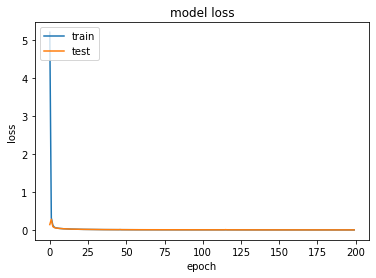

In [10]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=200,validation_split=0.2,batch_size=32,callbacks=[checkpoint])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

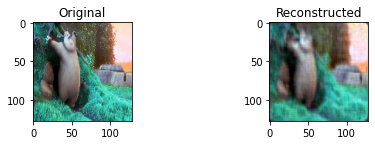

------------------------------ SSIM: 0.6500638149664831 ------------------------------


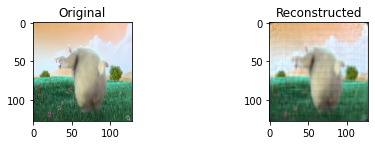

------------------------------ SSIM: 0.8854696389944866 ------------------------------


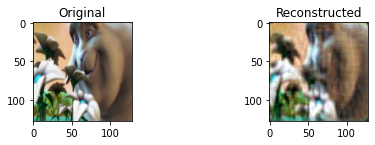

------------------------------ SSIM: 0.790628997755328 ------------------------------


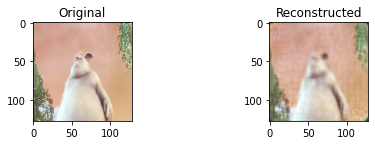

------------------------------ SSIM: 0.8367099944073465 ------------------------------


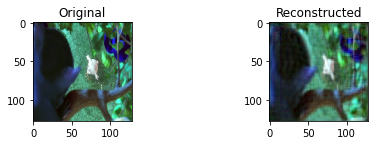

------------------------------ SSIM: 0.5003264915867435 ------------------------------


In [14]:
num_test = random.sample(range(0,len(X_test)),5)
for i in num_test:
    img = X_test[i]
    visualize(img,encoder,decoder)

In [15]:
bottle = encoder.predict(X_test)
predicted = decoder.predict(bottle)

print(f'The average Similarity image is : {round(overall_ssim(X_test,predicted),2)}')
print(f'The compression rate is: {round((np.prod(IMG_SHAPE)/embed_size),2)}')

The average Similarity image is : 0.78
The compression rate is: 49.15


In [22]:
reconstructed =[]
for i in range(len(images)):
    reconstructed.append(decoder.predict(encoder.predict(np.expand_dims(images[i],axis=0))))

In [45]:
out = cv2.VideoWriter('new.mp4',
                     cv2.VideoWriter_fourcc(*'DIVX'),15,
                     (128,128))

In [46]:
for i in range(len(reconstructed)):
    out.write(reconstructed[i])
out.release()

In [41]:
reconstructed=np.array(reconstructed) *255.

In [42]:
reconstructed[1]

array([[[[ 22.706255,  30.985342,  24.758179],
         [ 30.366594,  34.525944,  30.908077],
         [ 42.969917,  51.55641 ,  41.90567 ],
         ...,
         [125.11165 , 122.520134, 112.67392 ],
         [ 79.02575 ,  57.53451 ,  76.80989 ],
         [ 40.831345,  45.92606 ,  50.653774]],

        [[ 27.63263 ,  42.164   ,  33.658382],
         [ 33.551704,  43.602882,  43.21676 ],
         [ 48.81181 ,  64.03309 ,  50.782124],
         ...,
         [178.20377 , 157.12558 , 152.72005 ],
         [117.365845,  94.27336 , 117.39728 ],
         [ 75.4433  ,  65.9478  ,  69.88575 ]],

        [[ 42.852215,  64.896034,  52.445766],
         [ 56.13243 ,  68.01166 ,  67.747284],
         [ 61.486443,  88.7113  ,  76.594765],
         ...,
         [242.63277 , 225.91151 , 202.80745 ],
         [170.90616 , 153.11607 , 159.32668 ],
         [119.54837 , 110.21963 , 104.979294]],

        ...,

        [[ 43.04011 ,  73.7973  ,  71.38588 ],
         [ 46.752003,  86.22252 ,  96.18753 ]